In [30]:
from keras.layers import Input, Lambda, Dense, Flatten,BatchNormalization, Dropout
from keras.models import Model
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
!ls '../images'

'Age related Macular Degeneration'   Diabetes   Hypertension   Normal
 Cataract			     Glaucoma   Myopia	      'Other diseases'


In [3]:
#Give dataset path
folder_path = '../images'

Working with 2816 images
Image examples: 
1515_right-N.jpg


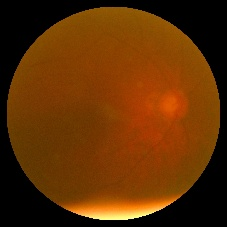

896_left-N.jpg


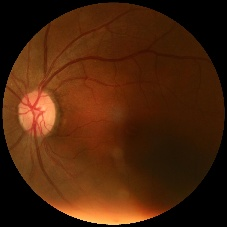

172_right-N.jpg


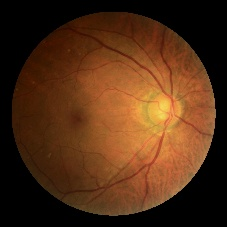

3256_right-N.jpg


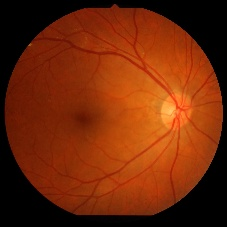

85_left-N.jpg


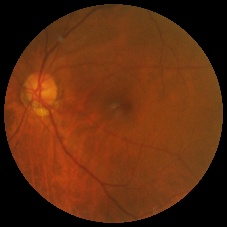

3342_left-N.jpg


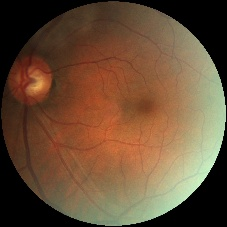

2834_right-N.jpg


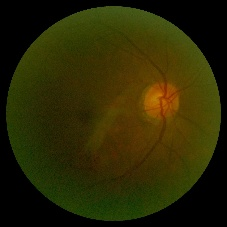

3423_left-N.jpg


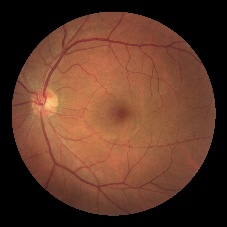

2881_left-N.jpg


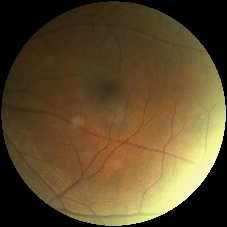

2830_right-N.jpg


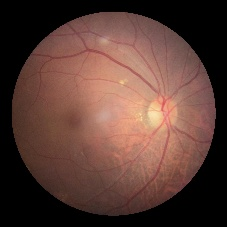

In [4]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = folder_path+'/Normal'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [8]:
folders = glob(folder_path+'/*')
print(len(folders))

8


In [31]:
model = keras.models.load_model('mymodel.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3,
    fill_mode='nearest')

In [11]:
train_set = train_datagen.flow_from_directory(folder_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

Found 4215 images belonging to 8 classes.


In [12]:
test_set = train_datagen.flow_from_directory(folder_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 1801 images belonging to 8 classes.


In [13]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)
callbacks = [checkpoint]

In [ ]:
model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=5,
  validation_steps=32,
  callbacks=callbacks,
  use_multiprocessing=True,
  verbose=2)


duration = datetime.now() - start
print("\nTraining completed in time: ", duration)

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
from datetime import datetime
model_date = datetime.today().strftime('%Y-%m-%d')

In [33]:
!tensorflowjs_converter --input_format=keras mymodel.h5 ../assets/model/$model_date

2022-10-26 16:09:56.913770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 16:09:56.946056: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 16:09:57.641452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-26 16:09:57.641568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-10-26 16:09:57.641611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Ca

In [35]:
import requests
r = requests.post( url= "https://170-187-231-106.ip.linodeusercontent.com/EyeCare/m.php", data={"tgl":model_date},timeout=0.5)
r.text

'Operasi Berhasil'